# Necessary Libraries

In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import join

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import time

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


# Load Dataset

In [3]:
dataset_path = os.path.join(os.getcwd(), '..', 'Data', 'MH-100K_dataset', 'processed')

dataset_path = os.path.abspath(dataset_path)

print(dataset_path)

c:\Users\megha\Documents\MTech\MinorProject_PlayProtect\Final_Review_Implementation\Code_Review_GitHub_Repo\Data\MH-100K_dataset\processed


In [4]:
files = dataframe(os.listdir(dataset_path) , columns=['filename'])
files

,filename
0,mh100-features-all.csv
1,mh100-features-classes.csv
2,mh100.npy
3,mh100_labels.csv
4,mh100_vt-labels.csv
5,mh_100k_dataset.csv


In [6]:
# Loading the dataset
start_time = time.time()

data = pd.read_csv(os.path.join(dataset_path, 'mh_100k_dataset.csv'))

end_time = time.time()
time_taken_minutes = (end_time - start_time) / 60

print(f"Time taken to load the dataset: {time_taken_minutes:.4f} minutes")

Time taken to load the dataset: 14.3941 minutes


In [7]:
data.shape

(70306, 24842)

In [8]:
# Loading the labels
vt_labels = pd.read_csv(join(dataset_path,'mh100_vt-labels.csv'))
vt_labels.drop(columns=['index'], inplace=True)
vt_labels

,1-class,2-class,3-class,4-class,5-class,6-class,7-class,8-class,9-class,10-class,...,31-class,32-class,33-class,34-class,37-class,38-class,39-class,41-class,43-class,46-class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101929,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
vt_labels['4-class'].value_counts()

4-class
0    92134
1     9800
Name: count, dtype: int64

# Create smaller dataset with 10 features

In [10]:
# Feature set with 10 features

columns_to_read_10 =['Permission::GET_ACCOUNTS','Permission::BROADCAST_STICKY',
                 'Permission::ACCESS_NETWORK_STATE','Permission::READ_CONTACTS',
                'Permission::CHANGE_NETWORK_STATE','Permission::BLUETOOTH','Permission::WAKE_LOCK',
                'Permission::READ_SMS','Permission::ACCESS_COARSE_LOCATION','Permission::VIBRATE']
data10 = data[columns_to_read_10]
data10.shape

(70306, 10)

## Dataset splitting

In [11]:
id_train, id_test = train_test_split(range(0, data.shape[0]), test_size=0.2, random_state=0, shuffle=True)
X_train = data10.iloc[id_train]
X_test = data10.iloc[id_test]
y_train = vt_labels.iloc[id_train]['4-class']
y_test = vt_labels.iloc[id_test]['4-class']

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (56244, 10) (56244,)
Test set shape: (14062, 10) (14062,)


In [12]:
y_train.value_counts()

4-class
0    52264
1     3980
Name: count, dtype: int64

In [13]:
y_test.value_counts()

4-class
0    13019
1     1043
Name: count, dtype: int64

## Dataset Balancing

In [43]:
# To balance dataset using smote (oversampling)
def balance_using_smote(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' will balance all classes
    X_res, y_res = smote.fit_resample(X_train.fillna(0), y_train.fillna(0))
    print(f"Original dataset size: {len(y_train)}")
    print(f"Balanced dataset size: {len(y_res)}")
    return X_res, y_res

In [44]:
# To balance dataset using undersampling
def balance_using_undersampling(X_train, y_train):
    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # 'auto' will balance all classes
    X_res, y_res = undersampler.fit_resample(X_train, y_train)
    print(f"Original dataset size: {len(y_train)}")
    print(f"Balanced dataset size: {len(y_res)}")
    return X_res, y_res


In [45]:
#Printing  distribution of original and balanced datasets

print("Original class distribution:")
print(X_train.shape, y_train.shape)
print(y_train.value_counts())

X_train_balanced_smote, y_train_balanced_smote = balance_using_smote(X_train, y_train)

print("\nSMOTE Balanced class distribution:")
print(X_train_balanced_smote.shape, y_train_balanced_smote.shape)
print(y_train_balanced_smote.value_counts())

X_train_balanced_undersample, y_train_balanced_undersample = balance_using_undersampling(X_train, y_train)

print("\nUndersampling Balanced class distribution:")
print(X_train_balanced_undersample.shape, y_train_balanced_undersample.shape)
print(y_train_balanced_undersample.value_counts())

Original class distribution:
(56244, 10) (56244,)
4-class
0    52264
1     3980
Name: count, dtype: int64
Original dataset size: 56244
Balanced dataset size: 104528

SMOTE Balanced class distribution:
(104528, 10) (104528,)
4-class
0    52264
1    52264
Name: count, dtype: int64
Original dataset size: 56244
Balanced dataset size: 7960

Undersampling Balanced class distribution:
(7960, 10) (7960,)
4-class
0    3980
1    3980
Name: count, dtype: int64


# Model Training and Testing

In [46]:
# Function to evaluate the model and return metrics in a dataframe
def evaluate_model(X_train, y_train, X_test, y_test):
   
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
       
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    return {
        'Dataset':'',
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    }, y_pred

## Comparison of normal vs balanced datasets

In [47]:

results = []

original_metrics, y_pred_orig = evaluate_model(X_train, y_train, X_test, y_test)
original_metrics['Dataset'] = 'Original'
results.append(original_metrics)

smote_metrics, y_pred_smote = evaluate_model(X_train_balanced_smote, y_train_balanced_smote, X_test, y_test)
smote_metrics['Dataset'] = 'Balanced with SMOTE'
results.append(smote_metrics)


undersample_metrics, y_pred_undersample = evaluate_model(X_train_balanced_undersample, y_train_balanced_undersample, X_test, y_test)
undersample_metrics['Dataset'] = 'Balanced with Undersampling'
results.append(undersample_metrics)


metrics_df = pd.DataFrame(results)
metrics_df

,Dataset,Accuracy,Recall,Precision,F1 Score
0,Original,0.928531,0.607295,0.742015,0.642753
1,Balanced with SMOTE,0.877045,0.775726,0.651676,0.686494
2,Balanced with Undersampling,0.872493,0.781647,0.648875,0.683960


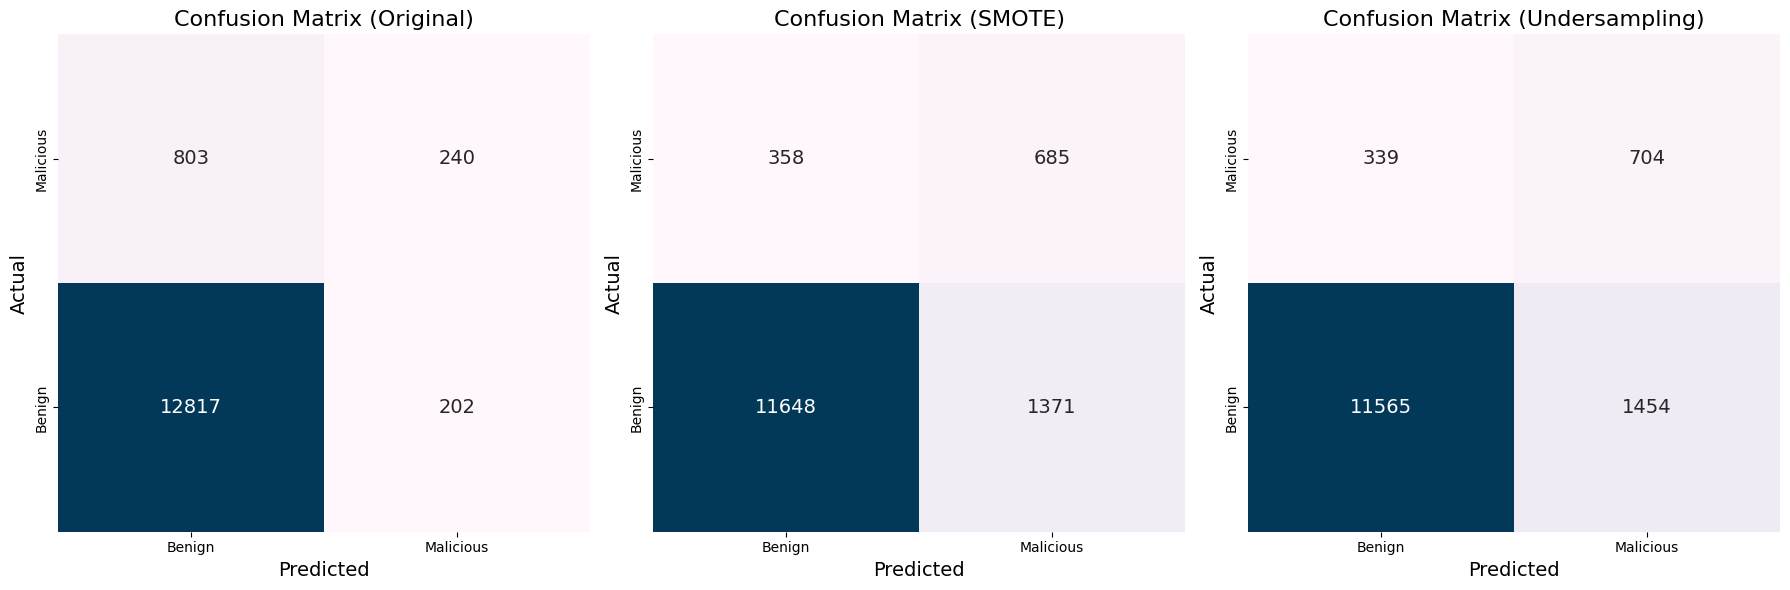

In [48]:
# Confusion matrices for normal and balanced datasets

datasets = ['Original', 'SMOTE', 'Undersampling']
y_preds = [y_pred_orig, y_pred_smote, y_pred_undersample]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

for i, dataset in enumerate(datasets):
   
    cm = confusion_matrix(y_test, y_preds[i])
    
    cm = cm[::-1]  

    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Benign', 'Malicious'], yticklabels=['Malicious', 'Benign'], 
                ax=axes[i], cbar=False, annot_kws={"size": 14}) 
    
    axes[i].set_title(f'Confusion Matrix ({dataset})', fontsize=16)
    axes[i].set_xlabel('Predicted', fontsize=14) 
    axes[i].set_ylabel('Actual', fontsize=14) 

plt.subplots_adjust(wspace=0.4)  

plt.tight_layout()
plt.show()


## Using smote balanced dataset

In [49]:
# Feature set with 4 features
columns_to_read_4=['Permission::READ_CONTACTS','Permission::WAKE_LOCK',
                'Permission::READ_SMS','Permission::VIBRATE']

## Creating smote balanced datasets with the two feature sets (4 and 10 features)

In [50]:
X_train_4 = data[columns_to_read_4]
y_train_4 = vt_labels['4-class'][0:data.shape[0]]
X_train_4_bal, y_train_4_bal = balance_using_smote(X_train_4, y_train_4)

X_train_10 = data[columns_to_read_10]
y_train_10 = vt_labels['4-class'][0:data.shape[0]]
X_train_10_bal, y_train_10_bal = balance_using_smote(X_train_10, y_train_10)

print(X_train_10_bal.shape)
print(y_train_10_bal.shape)

print(X_train_4.shape)
print(y_train_4.shape)

Original dataset size: 70306
Balanced dataset size: 130566
Original dataset size: 70306
Balanced dataset size: 130566
(130566, 10)
(130566,)
(70306, 4)
(70306,)


## Loading the test dataset

In [51]:
testset_path = os.path.join(os.getcwd(), '..')
data_test = pd.read_excel(os.path.join(testset_path, 'Data/Test_Dataset_1.xlsx'))

# Creating data and labels for both feature sets
X_test_ = data_test.iloc[:, 1:].copy() 
y_test_ = len(X_test_)*[1]

X_test_4 = X_test_[columns_to_read_4]
X_test_10 = X_test_[columns_to_read_10]

## Training model for both feature sets

In [52]:
model_4 = RandomForestClassifier(random_state=2024)
model_10 = RandomForestClassifier(random_state=2024)

model_4.fit(X_train_4_bal, y_train_4_bal)
model_10.fit(X_train_10_bal, y_train_10_bal)

y_pred_4 = model_4.predict(X_test_4)
y_pred_10 = model_10.predict(X_test_10)

## Confusion matrices for both feature sets

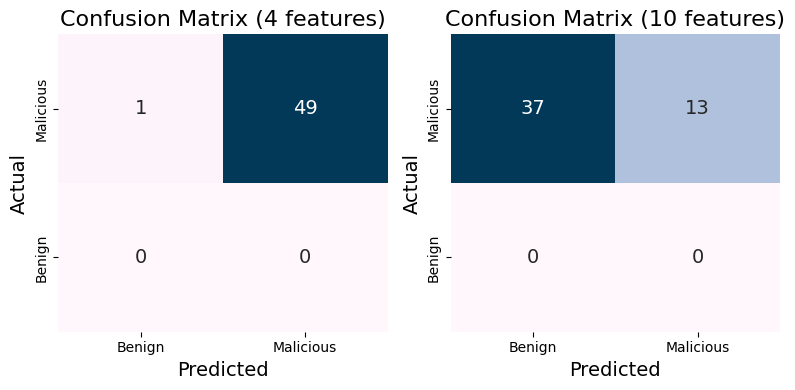

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  

predictions = [y_pred_4, y_pred_10]
datasets = ['4 features', '10 features']

for i, dataset in enumerate(datasets):
    
    cm = confusion_matrix(y_test_, predictions[i])
    
    cm = cm[::-1]  
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Benign', 'Malicious'], yticklabels=['Malicious', 'Benign'], 
                ax=axes[i], cbar=False, annot_kws={"size": 14})  
    
    axes[i].set_title(f'Confusion Matrix ({dataset})', fontsize=16)  
    axes[i].set_xlabel('Predicted', fontsize=14) 
    axes[i].set_ylabel('Actual', fontsize=14)  

plt.subplots_adjust(wspace=0.3)  

plt.tight_layout()
plt.show()